In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv('BankNote_Authentication.csv')

In [3]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
print(df.shape)

(1372, 5)


In [5]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [6]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [7]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

variance
C:\Users\HP\anaconda3\envs\banknote\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


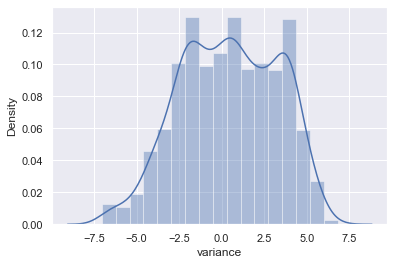

skewness
C:\Users\HP\anaconda3\envs\banknote\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


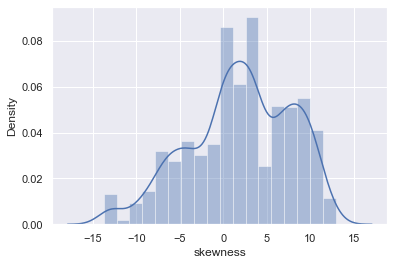

curtosis
C:\Users\HP\anaconda3\envs\banknote\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


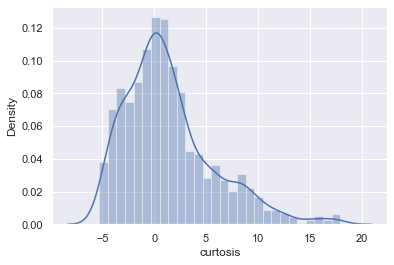

entropy
C:\Users\HP\anaconda3\envs\banknote\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


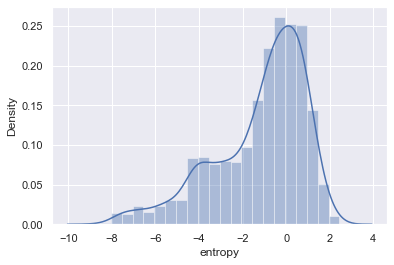

class
C:\Users\HP\anaconda3\envs\banknote\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


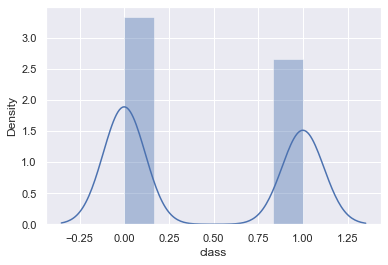

In [9]:
##Checking for the distribution
for i in df.describe().columns:
    print(i)
    sns.distplot(df[i])
    plt.show()

C:\Users\HP\anaconda3\envs\banknote\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


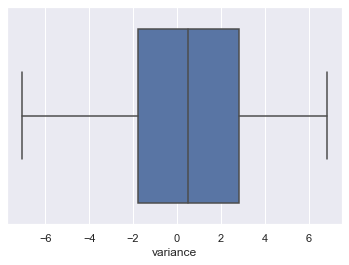

C:\Users\HP\anaconda3\envs\banknote\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


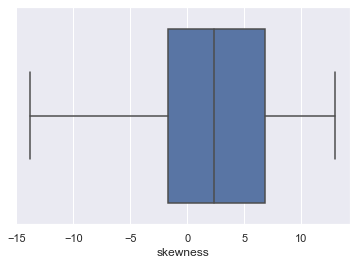

C:\Users\HP\anaconda3\envs\banknote\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


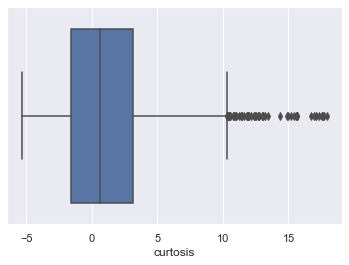

C:\Users\HP\anaconda3\envs\banknote\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


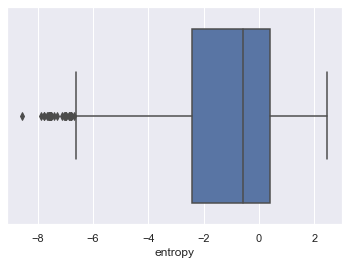

C:\Users\HP\anaconda3\envs\banknote\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


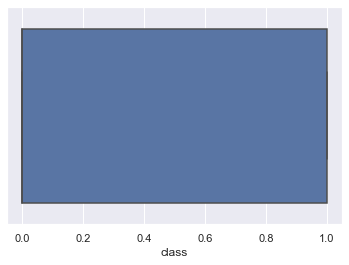

In [10]:
##Plotting boxplot
for i in df.describe().columns:
    sns.boxplot(df[i])
    plt.show()

<AxesSubplot:>

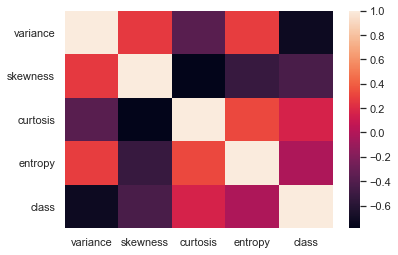

In [11]:
##checking for correlation
sns.heatmap(df.corr())

### Handling outliers

In [12]:
for variable in df.columns:
    if variable!='class':
         #calculate the IQR
        IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

        #calculate the boundries
        lower = df[variable].quantile(0.25) - (IQR * 1.5)
        upper = df[variable].quantile(0.75) + (IQR * 1.5)
        # replacing the outliers
        df[variable] = np.where(df[variable] > upper, upper, np.where(df[variable] < lower, lower, df[variable]))


C:\Users\HP\anaconda3\envs\banknote\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


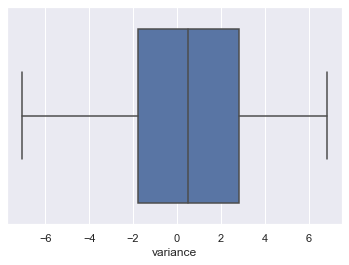

C:\Users\HP\anaconda3\envs\banknote\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


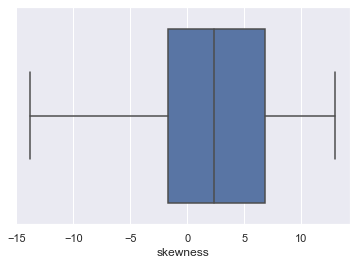

C:\Users\HP\anaconda3\envs\banknote\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


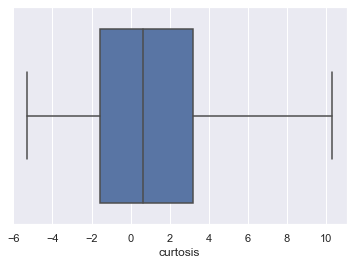

C:\Users\HP\anaconda3\envs\banknote\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


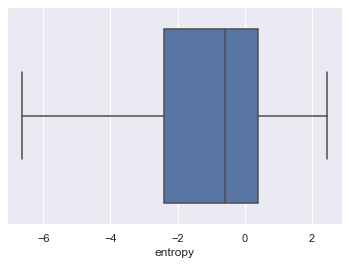

C:\Users\HP\anaconda3\envs\banknote\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


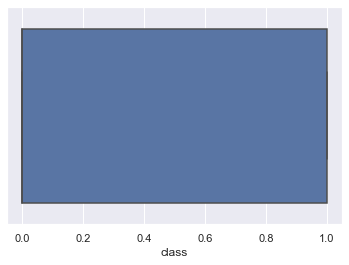

In [13]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [14]:
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.807300,-0.44699,0
1,4.54590,8.16740,-2.458600,-1.46210,0
2,3.86600,-2.63830,1.924200,0.10645,0
3,3.45660,9.52280,-4.011200,-3.59440,0
4,0.32924,-4.45520,4.571800,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.450100,-0.55949,1
1368,-1.38870,-4.87730,6.477400,0.34179,1
1369,-3.75030,-13.45860,10.310588,-2.77710,1
1370,-3.56370,-8.38270,10.310588,-1.28230,1


### Applying algorithms

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [16]:
x = df.iloc[:,:-1]#Independent variables 
y = df['class']#dependent variables

In [17]:
print(x.shape,'\n',y.shape)

(1372, 4) 
 (1372,)


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20,random_state = 77)

In [19]:
##Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

LogisticRegression()

In [20]:
lr_ypred = model_lr.predict(x_test)
lr_ypred

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [21]:
print(f'Accuracy score of logistic regression:{accuracy_score(y_test, lr_ypred)}')

Accuracy score of logistic regression:0.9890909090909091


In [22]:
print(f'confusion matrix: \n{confusion_matrix(y_test, lr_ypred)}\nClassification report: {classification_report(y_test, lr_ypred)}')

confusion matrix: 
[[144   2]
 [  1 128]]
Classification report:               precision    recall  f1-score   support

           0       0.99      0.99      0.99       146
           1       0.98      0.99      0.99       129

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [23]:
##Decison Tree classifier
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [24]:
dt_ypred = model_dt.predict(x_test)

In [25]:
print(f'Accuracy score of Decision Tree:{accuracy_score(y_test, dt_ypred)}')

Accuracy score of Decision Tree:0.9854545454545455


In [26]:
print(f'confusion matrix: \n{confusion_matrix(y_test, dt_ypred)}\nClassification report: \n{classification_report(y_test, dt_ypred)}')

confusion matrix: 
[[145   1]
 [  3 126]]
Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       146
           1       0.99      0.98      0.98       129

    accuracy                           0.99       275
   macro avg       0.99      0.98      0.99       275
weighted avg       0.99      0.99      0.99       275



In [27]:
##Randomforest Classifier
model_rf = RandomForestClassifier(n_estimators = 100)
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [28]:
rf_ypred = model_rf.predict(x_test)

In [29]:
print(f'Accuracy score of Random Forest Classifier:{accuracy_score(y_test, rf_ypred)}')

Accuracy score of Random Forest Classifier:1.0


In [30]:
print(f'confusion matrix: \n{confusion_matrix(y_test, rf_ypred)}\nClassification report: \n{classification_report(y_test, rf_ypred)}')

confusion matrix: 
[[146   0]
 [  0 129]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00       129

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



Random forest comes out most effecient alogorithm above all applied algorithms, so I am going to pickle decision tree classifier.

In [32]:
import pickle
BNA_classifier= open("BNA_classifier.pkl","wb")
pickle.dump(model_rf, BNA_classifier)
BNA_classifier.close()